# Regression between sea level height and the timmerman wind data regions for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [115]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs

data_type = 'historical'
model = 'Timmerman'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot cmip6 sea level data (zos) historical

In [116]:
# Open data file
zos = imprt.import_cmip6_slh_data()

In [117]:
zos

<xarray.Dataset>
Dimensions:  (model: 51, station: 7, time: 165)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * station  (station) object 'Vlissingen' 'Hoek v. Holland' ... 'Average'
Data variables:
    zos      (station, model, time) float64 ...

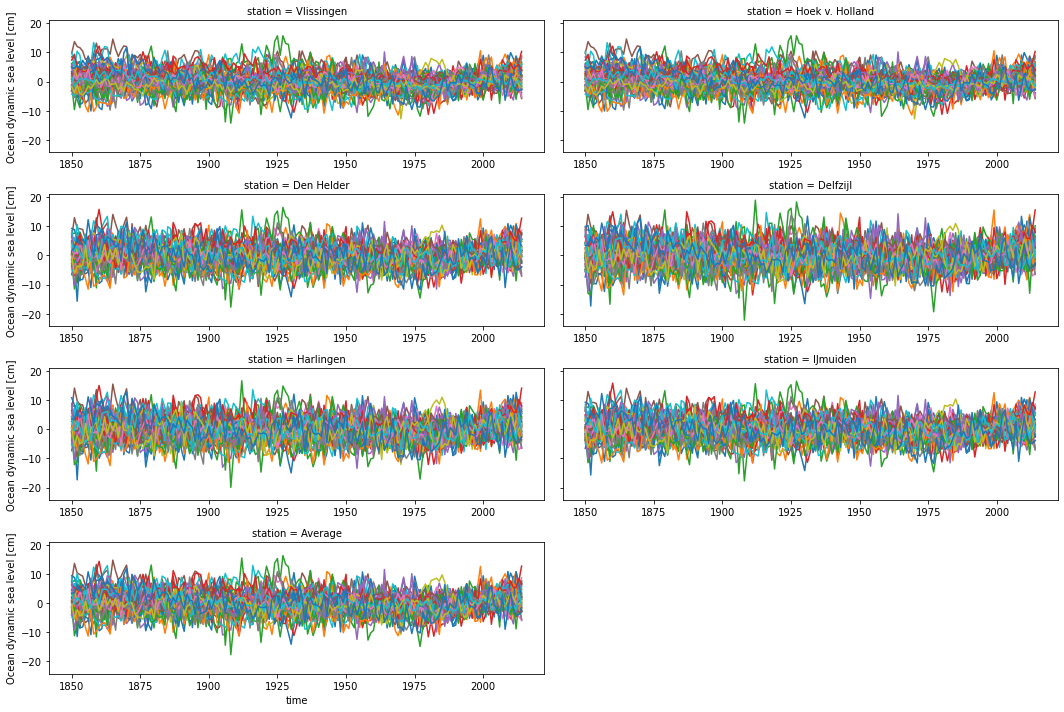

In [118]:
figs.plot_zos_data(zos, data_type)

#### Import and plot nearby wind data

In [119]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [120]:
wind_data

<xarray.Dataset>
Dimensions:     (model: 43, tim_region: 7, time: 165)
Coordinates:
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time        (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * tim_region  (tim_region) <U10 'Channel' 'South' ... 'North-East' 'Average'
Data variables:
    u2          (tim_region, model, time) float64 0.5621 1.51 ... 2.628 3.459
    v2          (tim_region, model, time) float64 0.01967 -0.2905 ... 0.1232

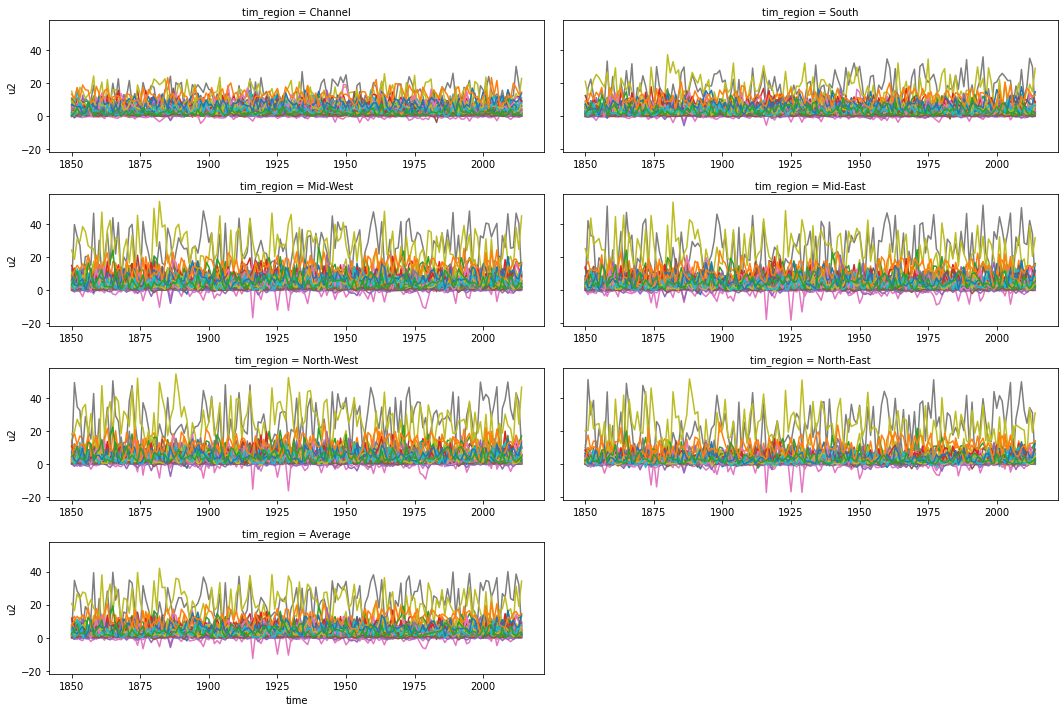

In [121]:
figs.plot_cmip6_wind_data(wind_data, 'u2', model, data_type)

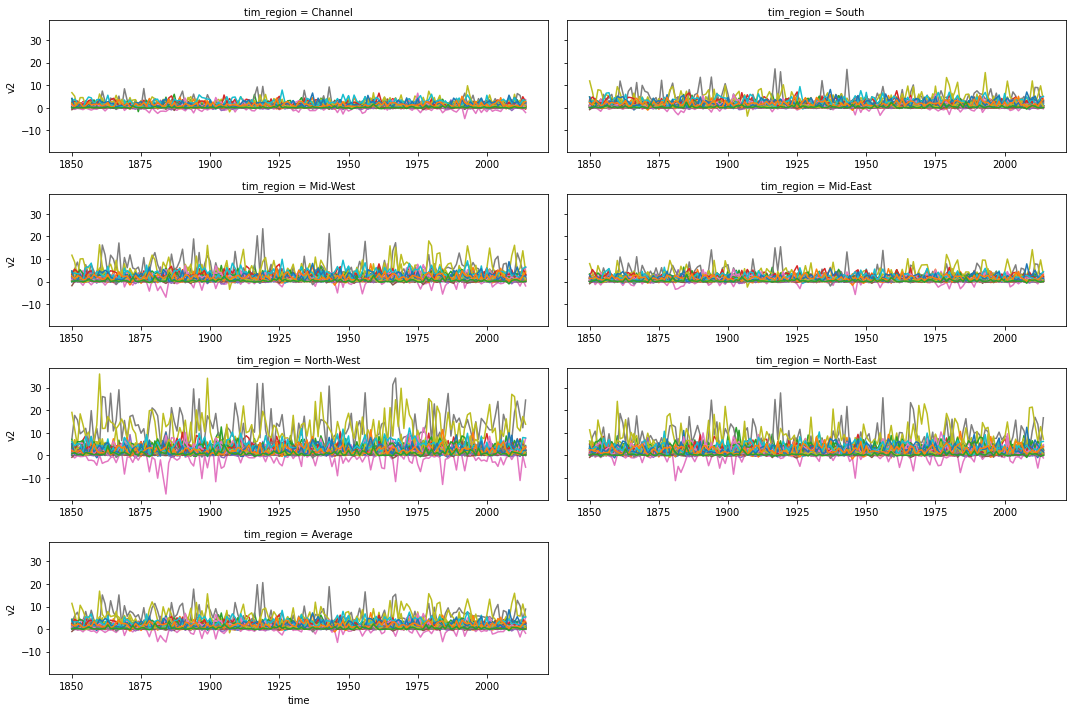

In [122]:
figs.plot_cmip6_wind_data(wind_data, 'v2', model, data_type)

### Perform regression

In [123]:
results, timeseries = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

/Users/iriskeizer/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.880517694794776, tolerance: 0.12410756873661674
  model = cd_fast.enet_coordinate_descent(
/Users/iriskeizer/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.880517694794776, tolerance: 0.12410756873661674
  model = cd_fast.enet_coordinate_descent(
/Users/iriskeizer/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.20118179553552, tolerance: 0.09761297868769246
  model = cd_fast.enet_coordinate_descent(
/Users/iriskeizer/opt/anaconda3/lib/python3.8/site-

In [124]:
results

<xarray.Dataset>
Dimensions:       (model: 37, station: 7)
Coordinates:
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    r2            (model, station) float64 nan nan 0.4834 0.5264 ... nan nan nan
    r2_wind       (model, station) float64 nan nan 0.4199 0.4742 ... nan nan nan
    r2_u2         (model, station) float64 nan nan 0.3363 0.4117 ... nan nan nan
    r2_v2         (model, station) float64 nan nan 0.09034 ... nan nan nan
    rmse          (model, station) float64 nan nan 3.06 3.164 ... nan nan nan
    constant      (model, station) float64 0.3237 0.3237 ... -0.03851 0.327
    channel_u2    (model, station) float64 0.5079 0.5079 ... 0.4028 0.3932
    channel_v2    (model, station) float64 -0.213 -0.213 ... -1.05 -0.8393
    south_u2      (model, station) float64 -1.165 -1.165 ... -2.436 -1.218
    south_v2      (model, station) float64 1.718 1.718 2.053 ... 1.482 0.4145
    midwest_u2    (model, station) float64 -0.0 -0.0 -0.0 ... 4.55 7.052 4.073
    midwest_v2    (model, station) float64 0.0 0.0 0.3172 ... -0.9288 -0.3641
    mideast_u2    (model, station) float64 -0.9054 -0.9054 ... -5.99 -3.904
    mideast_v2    (model, station) float64 -2.728 -2.728 -3.342 ... 1.02 1.253
    northwest_u2  (model, station) float64 2.368 2.368 2.761 ... -3.141 -2.282
    northwest_v2  (model, station) float64 0.04218 0.04218 ... -0.651 -0.5923
    northeast_u2  (model, station) float64 0.9517 0.9517 0.39 ... 3.664 2.633
    northeast_v2  (model, station) float64 0.1999 0.1999 0.6148 ... 0.0 0.0 0.0
    average_u2    (model, station) float64 -0.0 -0.0 -0.0 0.0 ... -0.0 -0.0 -0.0
    average_v2    (model, station) float64 0.0 0.0 0.0 0.0 ... -0.0 -0.0 -0.0
    trend         (model, station) float64 1.113 1.113 1.064 ... -2.29 -2.478

In [125]:
timeseries

<xarray.Dataset>
Dimensions:       (model: 37, station: 7, time: 165)
Coordinates:
  * time          (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014
  * station       (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model         (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    channel_u2    (model, station, time) float64 -0.3447 -0.07054 ... -0.3806
    channel_v2    (model, station, time) float64 0.0775 0.2601 ... -0.597 0.2231
    south_u2      (model, station, time) float64 0.2655 -0.5039 ... 0.819
    south_v2      (model, station, time) float64 -0.9214 -1.293 ... -0.2617
    midwest_u2    (model, station, time) float64 0.0 -0.0 ... -0.6139 -1.125
    midwest_v2    (model, station, time) float64 -0.0 -0.0 ... -0.9545 0.1899
    mideast_u2    (model, station, time) float64 -0.2686 -0.9954 ... -1.061
    mideast_v2    (model, station, time) float64 1.027 2.128 ... 3.53 -0.8998
    northwest_u2  (model, station, time) float64 0.0839 3.499 ... 0.1508 -0.4832
    northwest_v2  (model, station, time) float64 -0.02659 -0.02951 ... 0.2414
    northeast_u2  (model, station, time) float64 0.4307 1.988 ... -0.8117 1.616
    northeast_v2  (model, station, time) float64 -0.1014 -0.1749 ... 0.0 -0.0
    average_u2    (model, station, time) float64 0.0 -0.0 -0.0 ... 0.0 -0.0 0.0
    average_v2    (model, station, time) float64 -0.0 -0.0 0.0 ... 0.0 -0.0 0.0
    trend         (model, station, time) float64 -1.915 -1.892 ... -4.214 -4.266
    total         (model, station, time) float64 -0.3447 -0.07054 ... -0.3806
    wind_total    (model, station, time) float64 -0.3447 -0.07054 ... -0.3806
    channel       (model, station, time) float64 -0.2672 0.1895 ... -0.1575
    south         (model, station, time) float64 -0.6559 -1.797 ... 1.038 0.5574
    midwest       (model, station, time) float64 0.0 0.0 0.0 ... -1.568 -0.9353
    mideast       (model, station, time) float64 0.7582 1.133 ... 4.424 -1.961
    northwest     (model, station, time) float64 0.05731 3.47 ... -1.879 -0.2417
    northeast     (model, station, time) float64 0.3293 1.813 ... -0.8117 1.616
    average       (model, station, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    u2_total      (model, station, time) float64 0.1667 3.918 ... 0.0908 -0.6153
    v2_total      (model, station, time) float64 0.05496 0.8905 ... -0.507

#### Plot regression results

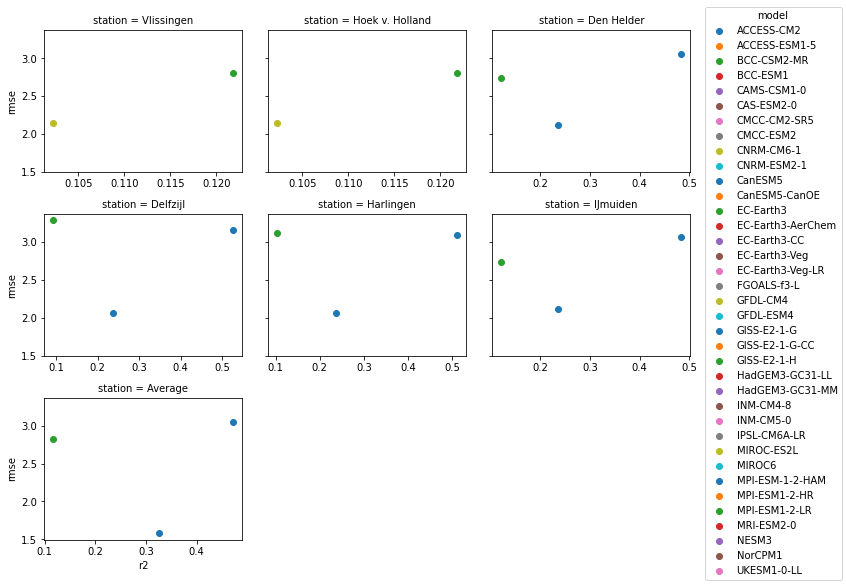

In [126]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

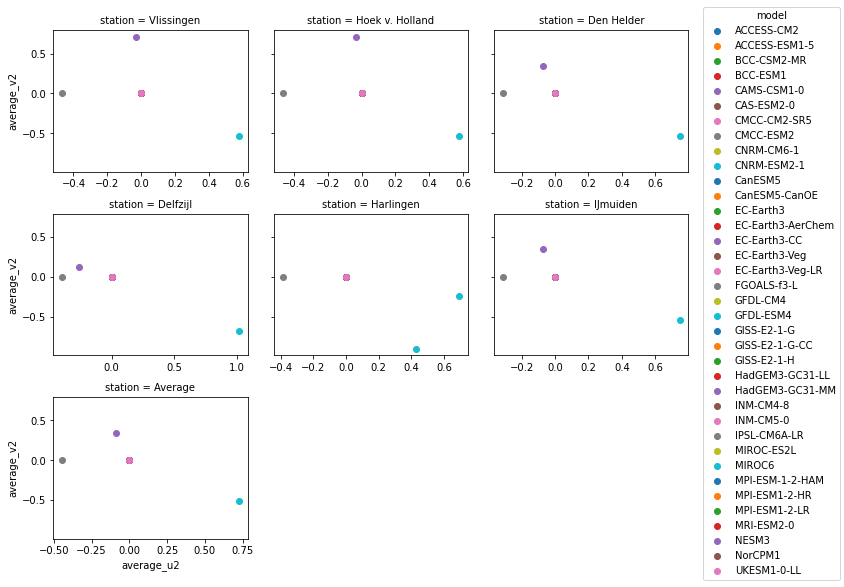

In [127]:
figs.plot_cmip6_two_variables(results, 'average_u2', 'average_v2', data_type)

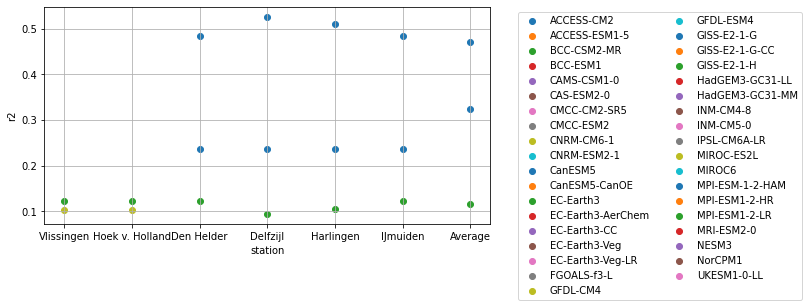

In [128]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

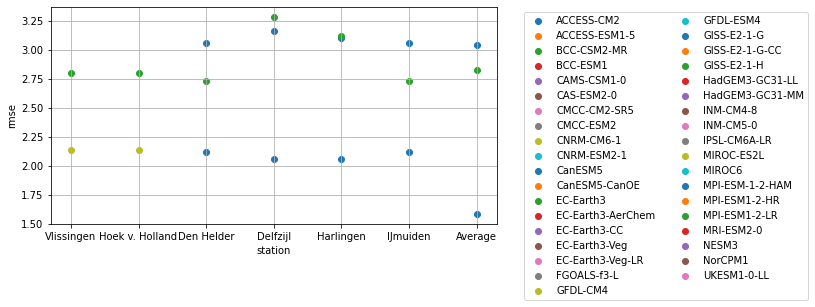

In [129]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

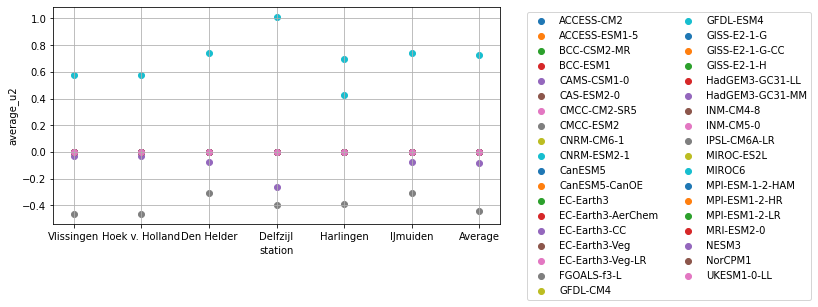

In [130]:
figs.plot_cmip6_result_per_station(results, 'average_u2', data_type)

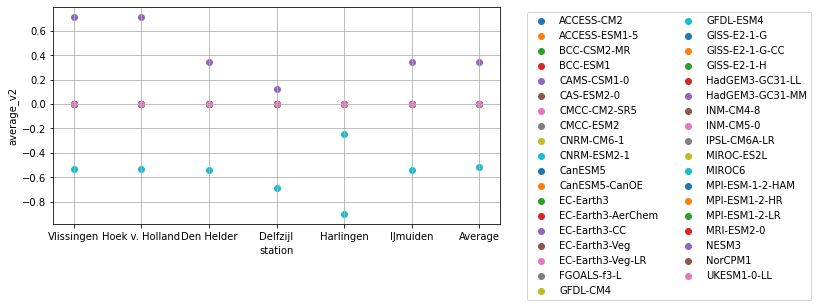

In [131]:
figs.plot_cmip6_result_per_station(results, 'average_v2', data_type)

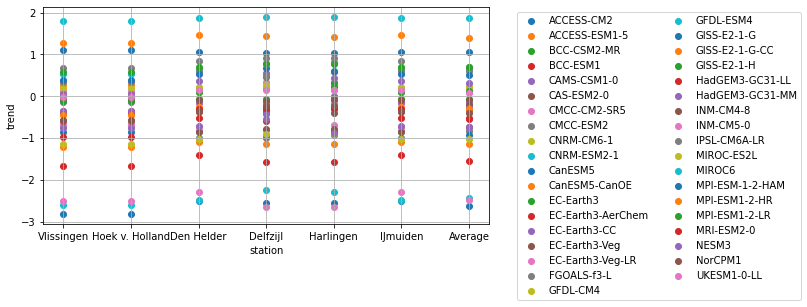

In [132]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

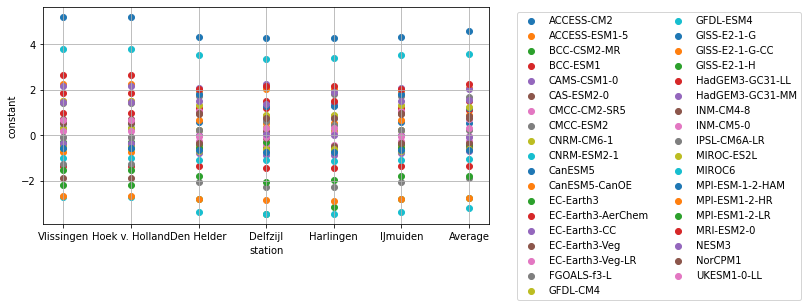

In [133]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

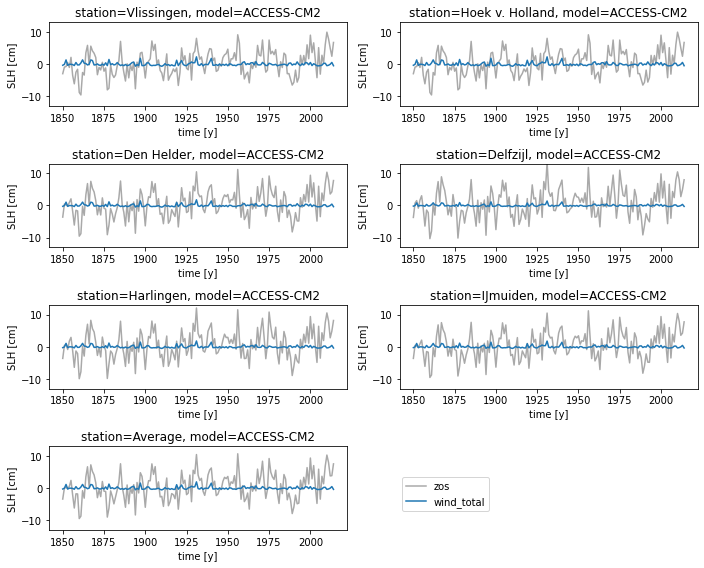

In [134]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['wind_total'])

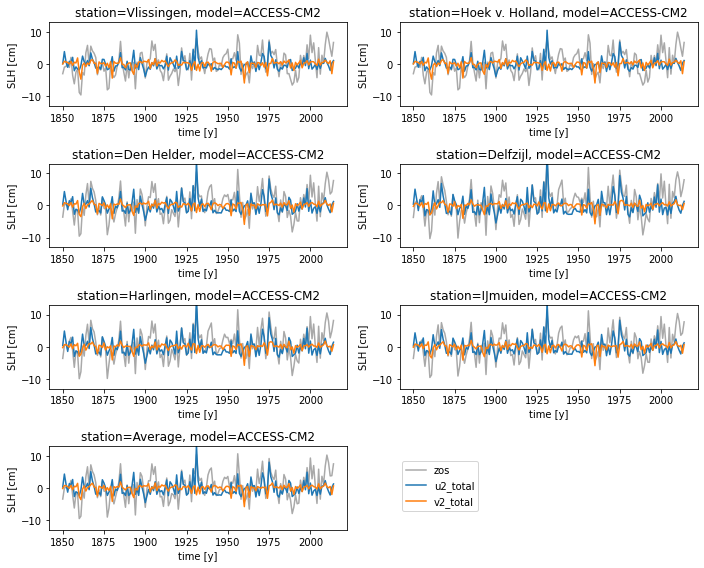

In [135]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['u2_total', 'v2_total'])

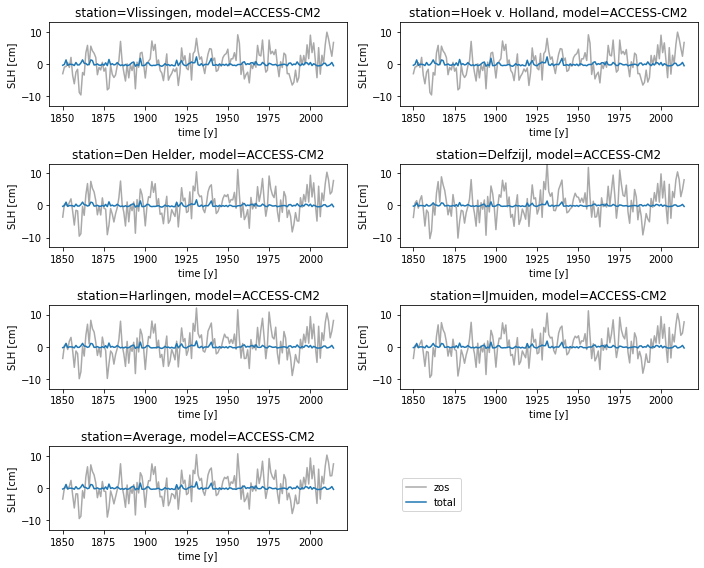

In [136]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['total'])

#### Plot trends

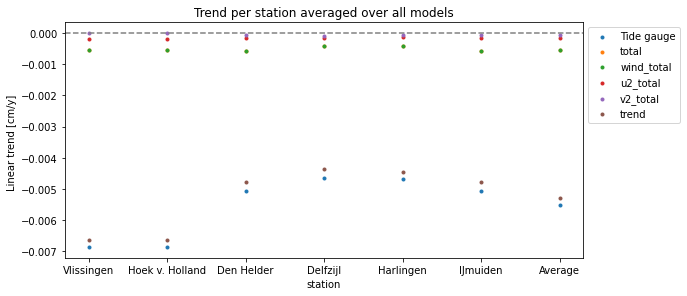

In [137]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2_total', 'v2_total', 'trend'], model, data_type, errorbar = False)